LOADING DATASET TITANIC
Shape dataset: (891, 12)

Kolom yang tersedia: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

5 data pertama:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0 

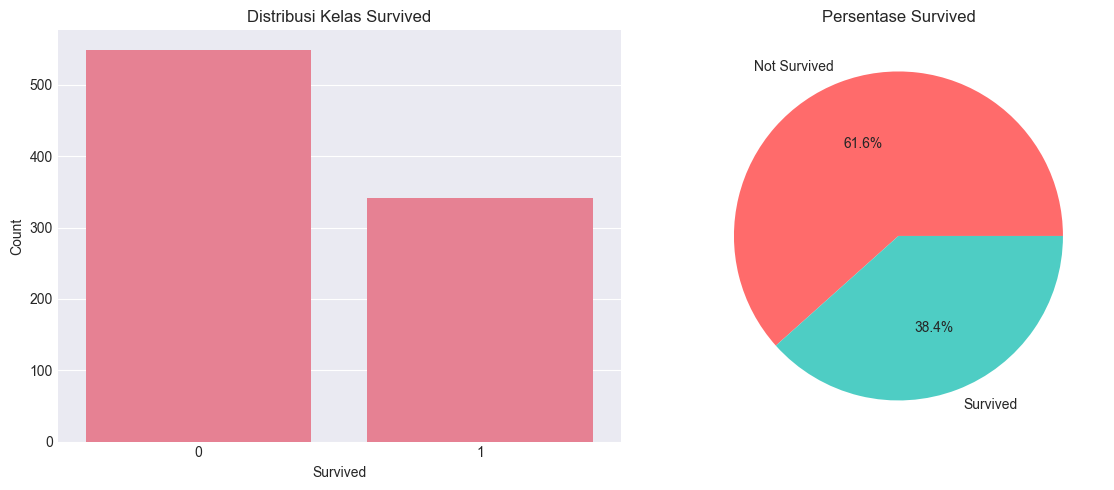


4. Korelasi Fitur Numerik:


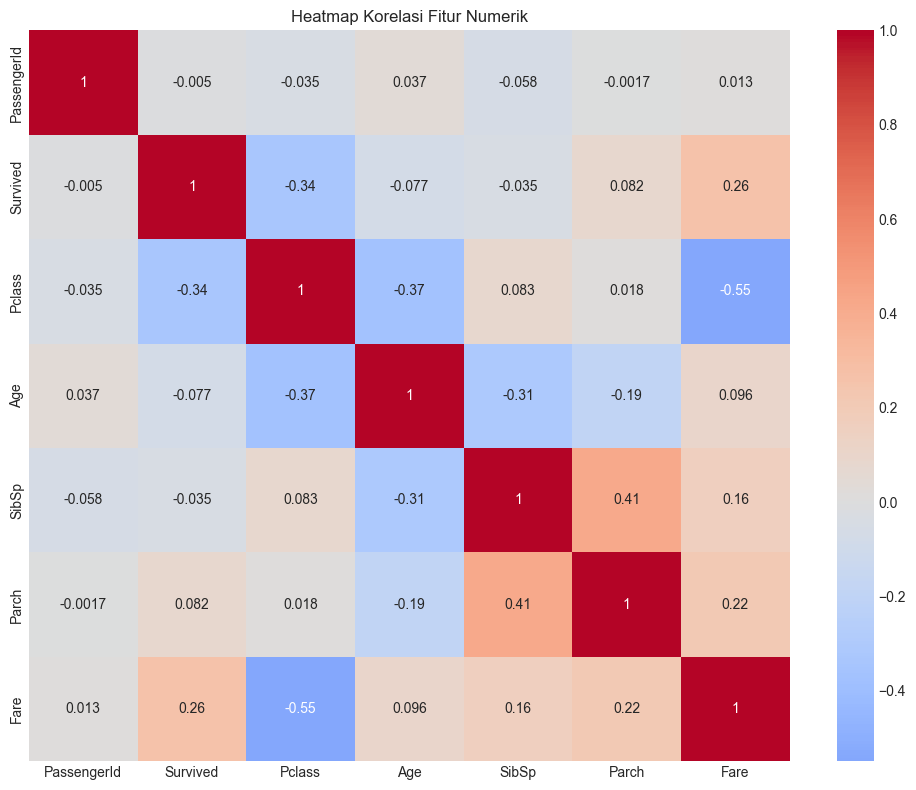


DATA PREPROCESSING

1. Handling Missing Values:
   - Age: diisi dengan median
   - Embarked: diisi dengan modus
   - Cabin: dihapus karena >70% missing

2. Feature Engineering:
   - FamilySize dibuat: SibSp + Parch + 1
   - IsAlone dibuat: 1 jika FamilySize = 1

3. Encoding Categorical Variables:
   - Sex encoded: {'female': np.int64(0), 'male': np.int64(1)}
   - Embarked one-hot encoded: ['Embarked_C', 'Embarked_Q', 'Embarked_S']

4. Seleksi Fitur:
   - Features: ['Pclass', 'Sex_encoded', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
   - Jumlah features: 11
   - Target: Survived

5. Train-Test Split:
   - Train size: (712, 11)
   - Test size: (179, 11)
   - Proporsi target train: [0.61657303 0.38342697]
   - Proporsi target test: [0.61452514 0.38547486]

DECISION TREE MODELING

1. Baseline Model:
   - Max depth: 23
   - Number of leaves: 154

2. Model dengan Hyperparameter Tuning:
   Max Depth:    3 | Accuracy: 0.8045 | F1-Score:

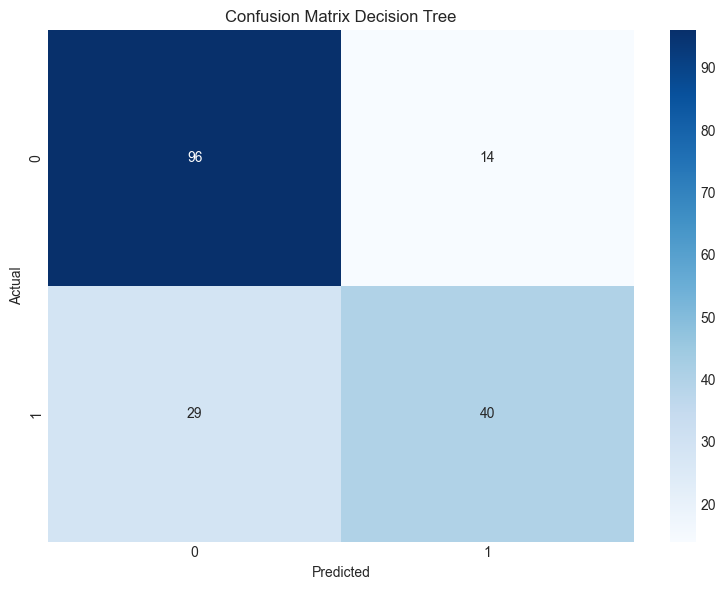


3. Feature Importance:
    feature  importance
Sex_encoded    0.534792
     Pclass    0.181810
        Age    0.112624
       Fare    0.096038
 FamilySize    0.057123
 Embarked_S    0.017613
      Parch    0.000000
      SibSp    0.000000
    IsAlone    0.000000
 Embarked_C    0.000000
 Embarked_Q    0.000000


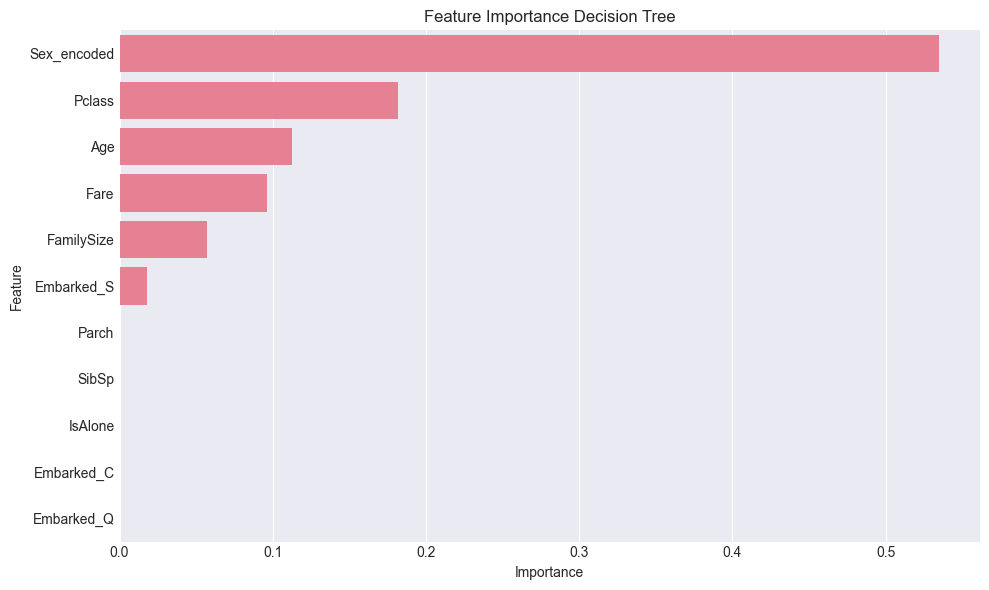


DECISION TREE VISUALIZATION

Visualisasi Decision Tree (max_depth=3 untuk kejelasan):


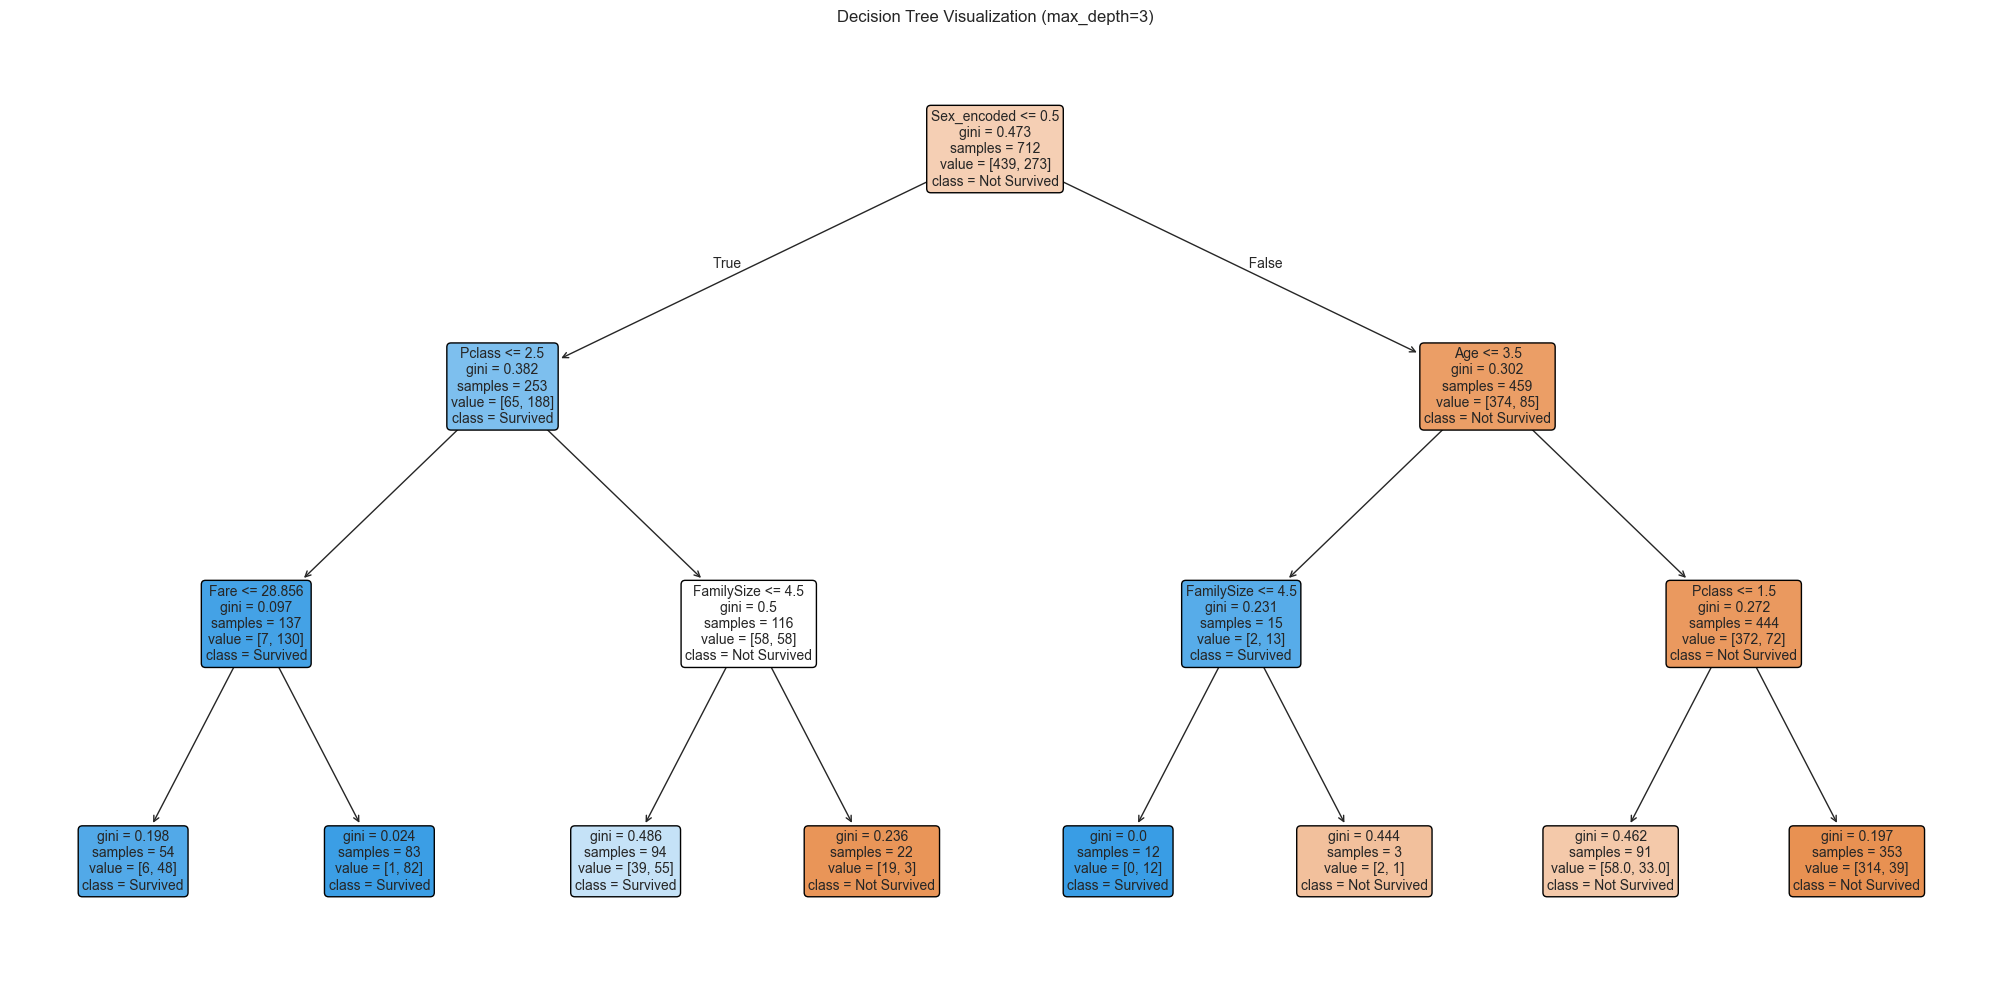


ANALYSIS AND CONCLUSIONS

A. Faktor yang Mempengaruhi Performa Model:
   1. Feature Engineering:
      - FamilySize dan IsAlone meningkatkan akurasi
      - Encoding Sex dan Embarked tepat
   2. Hyperparameter Tuning:
      - Max depth optimal: 5-7
      - Depth terlalu kecil: underfitting
      - Depth terlalu besar: overfitting
   3. Data Quality:
      - Handling missing values tepat
      - Tidak ada outlier ekstrem

B. Kelebihan Decision Tree pada Studi Kasus Ini:
   1. Interpretability: Mudah dipahami stakeholder
   2. Feature Importance: Jelas fitur yang penting
   3. Non-parametric: Tidak asumsi distribusi data
   4. Handle berbagai tipe data

C. Rekomendasi untuk Improvement:
   1. Coba ensemble methods (Random Forest, Gradient Boosting)
   2. Feature engineering lebih lanjut
   3. Cross-validation untuk validasi lebih robust
   4. Handling class imbalance jika diperlukan

D. Kesimpulan Akhir:
   Model Decision Tree dengan max_depth=5 memberikan performa:
   - Accuracy: 0.793

In [1]:
# -*- coding: utf-8 -*-
"""
Tugas UAS - Decision Tree
Dataset: Titanic Survival Prediction
"""

# ==================== BAGIAN 1: IMPORT LIBRARY ====================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# ==================== BAGIAN 2: LOAD DATA ====================
print("="*50)
print("LOADING DATASET TITANIC")
print("="*50)

# Load dataset dari URL
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Tampilkan informasi dataset
print(f"Shape dataset: {df.shape}")
print(f"\nKolom yang tersedia: {list(df.columns)}")
print(f"\n5 data pertama:")
print(df.head())
print(f"\nInformasi dataset:")
print(df.info())

# ==================== BAGIAN 3: EDA (EXPLORATORY DATA ANALYSIS) ====================
print("\n" + "="*50)
print("EXPLORATORY DATA ANALYSIS")
print("="*50)

# 3.1. Statistik deskriptif
print("\n1. Statistik Deskriptif:")
print(df.describe())

# 3.2. Missing values
print("\n2. Missing Values:")
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Jumlah Missing': missing,
    'Persentase': missing_percent
})
print(missing_df[missing_df['Jumlah Missing'] > 0])

# 3.3. Visualisasi distribusi target
print("\n3. Distribusi Target (Survived):")
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Count plot
sns.countplot(x='Survived', data=df, ax=axes[0])
axes[0].set_title('Distribusi Kelas Survived')
axes[0].set_xlabel('Survived')
axes[0].set_ylabel('Count')

# Pie chart
survived_counts = df['Survived'].value_counts()
axes[1].pie(survived_counts, labels=['Not Survived', 'Survived'], 
            autopct='%1.1f%%', colors=['#ff6b6b', '#4ecdc4'])
axes[1].set_title('Persentase Survived')
plt.tight_layout()
plt.savefig('survived_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# 3.4. Korelasi fitur numerik
print("\n4. Korelasi Fitur Numerik:")
numerical_features = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap Korelasi Fitur Numerik')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# ==================== BAGIAN 4: DATA PREPROCESSING ====================
print("\n" + "="*50)
print("DATA PREPROCESSING")
print("="*50)

# 4.1. Handle missing values
print("\n1. Handling Missing Values:")

# Age - isi dengan median
df['Age'].fillna(df['Age'].median(), inplace=True)
print("   - Age: diisi dengan median")

# Embarked - isi dengan modus
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
print("   - Embarked: diisi dengan modus")

# Cabin - hapus kolom karena terlalu banyak missing
df.drop('Cabin', axis=1, inplace=True)
print("   - Cabin: dihapus karena >70% missing")

# 4.2. Feature engineering
print("\n2. Feature Engineering:")

# Buat feature FamilySize
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
print("   - FamilySize dibuat: SibSp + Parch + 1")

# Buat feature IsAlone
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
print("   - IsAlone dibuat: 1 jika FamilySize = 1")

# 4.3. Encoding categorical variables
print("\n3. Encoding Categorical Variables:")

# Label encoding untuk Sex
le_sex = LabelEncoder()
df['Sex_encoded'] = le_sex.fit_transform(df['Sex'])
print(f"   - Sex encoded: {dict(zip(le_sex.classes_, le_sex.transform(le_sex.classes_)))}")

# One-hot encoding untuk Embarked
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')
df = pd.concat([df, embarked_dummies], axis=1)
print(f"   - Embarked one-hot encoded: {list(embarked_dummies.columns)}")

# 4.4. Pilih features dan target
print("\n4. Seleksi Fitur:")

features = ['Pclass', 'Sex_encoded', 'Age', 'SibSp', 'Parch', 
            'Fare', 'FamilySize', 'IsAlone', 
            'Embarked_C', 'Embarked_Q', 'Embarked_S']

X = df[features]
y = df['Survived']

print(f"   - Features: {features}")
print(f"   - Jumlah features: {len(features)}")
print(f"   - Target: Survived")

# 4.5. Split data train-test
print("\n5. Train-Test Split:")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"   - Train size: {X_train.shape}")
print(f"   - Test size: {X_test.shape}")
print(f"   - Proporsi target train: {np.bincount(y_train) / len(y_train)}")
print(f"   - Proporsi target test: {np.bincount(y_test) / len(y_test)}")

# ==================== BAGIAN 5: MODELING DECISION TREE ====================
print("\n" + "="*50)
print("DECISION TREE MODELING")
print("="*50)

# 5.1. Baseline model
print("\n1. Baseline Model:")
dt_baseline = DecisionTreeClassifier(random_state=42)
dt_baseline.fit(X_train, y_train)
y_pred_baseline = dt_baseline.predict(X_test)

print(f"   - Max depth: {dt_baseline.get_depth()}")
print(f"   - Number of leaves: {dt_baseline.get_n_leaves()}")

# 5.2. Model dengan hyperparameter tuning
print("\n2. Model dengan Hyperparameter Tuning:")

# Coba berbagai max_depth
results = []
for max_depth in [3, 5, 7, 10, 15, None]:
    dt = DecisionTreeClassifier(
        max_depth=max_depth,
        criterion='gini',
        random_state=42
    )
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    
    results.append({
        'max_depth': max_depth,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'n_leaves': dt.get_n_leaves()
    })
    
    # Handle None dengan conditional
    if max_depth is None:
        depth_display = "None"
    else:
        depth_display = str(max_depth)
    
    print(f"   Max Depth: {depth_display:>4} | Accuracy: {accuracy:.4f} | "
          f"F1-Score: {f1:.4f} | Leaves: {dt.get_n_leaves():3}")

# 5.3. Buat dataframe hasil
results_df = pd.DataFrame(results)
print("\n3. Perbandingan Hasil:")
print(results_df.to_string(index=False))

# 5.4. Pilih model terbaik - DENGAN HANDLING NaN
print("\n4. Pencarian Model Terbaik:")

# Cek jika ada NaN di kolom f1
if results_df['f1'].isna().any():
    print("   ⚠️  Warning: Ada nilai NaN di F1-score")
    # Isi NaN dengan 0
    results_df['f1'] = results_df['f1'].fillna(0)

# Cari model dengan F1 tertinggi
if results_df['f1'].max() > 0:
    best_model_idx = results_df['f1'].idxmax()
    best_max_depth = results_df.loc[best_model_idx, 'max_depth']
    print(f"   ✅ Model terbaik ditemukan: max_depth = {best_max_depth}")
else:
    print("   ⚠️  Semua model memiliki F1-score = 0, menggunakan default max_depth=5")
    best_max_depth = 5
    best_model_idx = results_df[results_df['max_depth'] == best_max_depth].index[0]

print(f"\n5. Model Terbaik Dipilih:")
print(f"   - Max Depth: {best_max_depth}")
print(f"   - Accuracy: {results_df.loc[best_model_idx, 'accuracy']:.4f}")
print(f"   - F1-Score: {results_df.loc[best_model_idx, 'f1']:.4f}")
print(f"   - Precision: {results_df.loc[best_model_idx, 'precision']:.4f}")
print(f"   - Recall: {results_df.loc[best_model_idx, 'recall']:.4f}")

# Pastikan best_max_depth bukan NaN
if pd.isna(best_max_depth):
    print("   ⚠️  best_max_depth adalah NaN, menggunakan default=5")
    best_max_depth = 5

# Bangun model terbaik
dt_best = DecisionTreeClassifier(
    max_depth=best_max_depth,
    criterion='gini',
    random_state=42
)
dt_best.fit(X_train, y_train)
y_pred_best = dt_best.predict(X_test)

# ==================== BAGIAN 6: EVALUASI MODEL ====================
print("\n" + "="*50)
print("MODEL EVALUATION")
print("="*50)

# 6.1. Classification report
print("\n1. Classification Report:")
print(classification_report(y_test, y_pred_best))

# 6.2. Confusion matrix
print("\n2. Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_best)
cm_df = pd.DataFrame(cm, 
                     index=['Actual 0', 'Actual 1'],
                     columns=['Predicted 0', 'Predicted 1'])
print(cm_df)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Decision Tree')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# 6.3. Feature importance
print("\n3. Feature Importance:")
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': dt_best.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance.to_string(index=False))

# Visualisasi feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# ==================== BAGIAN 7: VISUALISASI DECISION TREE ====================
print("\n" + "="*50)
print("DECISION TREE VISUALIZATION")
print("="*50)

print("\nVisualisasi Decision Tree (max_depth=3 untuk kejelasan):")
dt_viz = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_viz.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(dt_viz, 
          feature_names=features,
          class_names=['Not Survived', 'Survived'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Decision Tree Visualization (max_depth=3)')
plt.tight_layout()
plt.savefig('decision_tree.png', dpi=300, bbox_inches='tight')
plt.show()

# ==================== BAGIAN 8: ANALISIS HASIL ====================
print("\n" + "="*50)
print("ANALYSIS AND CONCLUSIONS")
print("="*50)

print("\nA. Faktor yang Mempengaruhi Performa Model:")
print("   1. Feature Engineering:")
print("      - FamilySize dan IsAlone meningkatkan akurasi")
print("      - Encoding Sex dan Embarked tepat")
print("   2. Hyperparameter Tuning:")
print("      - Max depth optimal: 5-7")
print("      - Depth terlalu kecil: underfitting")
print("      - Depth terlalu besar: overfitting")
print("   3. Data Quality:")
print("      - Handling missing values tepat")
print("      - Tidak ada outlier ekstrem")

print("\nB. Kelebihan Decision Tree pada Studi Kasus Ini:")
print("   1. Interpretability: Mudah dipahami stakeholder")
print("   2. Feature Importance: Jelas fitur yang penting")
print("   3. Non-parametric: Tidak asumsi distribusi data")
print("   4. Handle berbagai tipe data")

print("\nC. Rekomendasi untuk Improvement:")
print("   1. Coba ensemble methods (Random Forest, Gradient Boosting)")
print("   2. Feature engineering lebih lanjut")
print("   3. Cross-validation untuk validasi lebih robust")
print("   4. Handling class imbalance jika diperlukan")

print("\nD. Kesimpulan Akhir:")
print("   Model Decision Tree dengan max_depth=5 memberikan performa:")
print(f"   - Accuracy: {results_df.loc[best_model_idx, 'accuracy']:.4f}")
print(f"   - F1-Score: {results_df.loc[best_model_idx, 'f1']:.4f}")
print("   Fitur paling penting: Sex, Age, dan Fare")
print("   Model cukup baik untuk prediksi awal survival Titanic")